<a href="https://colab.research.google.com/github/SP-TechForest/Python-creations/blob/main/Machine_learning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import plotly.express as px
import numpy as np 
import sklearn
import matplotlib.pyplot as plt

#Data reading 

In [ ]:
data = pd.read_csv("Mall_Customers.csv")

In [ ]:
data.shape

(200, 5)

In [ ]:
data.columns = data.columns.str.replace(' ','_')
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
px.scatter(data, x = "CustomerID", y = "Age", color = "Genre")

In [ ]:
px.scatter(data, x = "CustomerID", y = "Annual_Income_(k$)", color = "Genre")

In [ ]:
px.scatter(data, x = "CustomerID", y = "Spending_Score_(1-100)", color = "Genre")

In [ ]:
feature = data.drop(columns = ["Genre","CustomerID","Age"]).values
target = data.Genre.values

In [ ]:
feature, target

(array([[ 15,  39],
        [ 15,  81],
        [ 16,   6],
        [ 16,  77],
        [ 17,  40],
        [ 17,  76],
        [ 18,   6],
        [ 18,  94],
        [ 19,   3],
        [ 19,  72],
        [ 19,  14],
        [ 19,  99],
        [ 20,  15],
        [ 20,  77],
        [ 20,  13],
        [ 20,  79],
        [ 21,  35],
        [ 21,  66],
        [ 23,  29],
        [ 23,  98],
        [ 24,  35],
        [ 24,  73],
        [ 25,   5],
        [ 25,  73],
        [ 28,  14],
        [ 28,  82],
        [ 28,  32],
        [ 28,  61],
        [ 29,  31],
        [ 29,  87],
        [ 30,   4],
        [ 30,  73],
        [ 33,   4],
        [ 33,  92],
        [ 33,  14],
        [ 33,  81],
        [ 34,  17],
        [ 34,  73],
        [ 37,  26],
        [ 37,  75],
        [ 38,  35],
        [ 38,  92],
        [ 39,  36],
        [ 39,  61],
        [ 39,  28],
        [ 39,  65],
        [ 40,  55],
        [ 40,  47],
        [ 40,  42],
        [ 40,  42],


#Kmeans Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(feature)
  wcss.append(kmeans.inertia_)

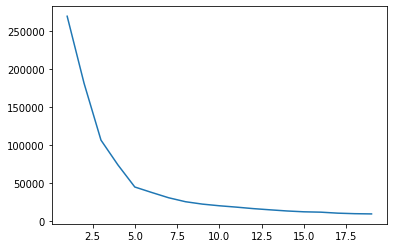

In [ ]:
plt.plot(range(1,20),wcss)

In [ ]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_pred = kmeans.fit_predict(feature)

In [ ]:
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
data["y_pred"] = pd.Series(y_pred)
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [ ]:
from os import name
fig = px.scatter(data, x ="Annual_Income_(k$)",
                 y = "Spending_Score_(1-100)", color = data.y_pred.astype(str))
fig.add_scatter(x = kmeans.cluster_centers_[:,0],
                y = kmeans.cluster_centers_[:,1],name = "Centroids")
fig.update_layout(
    legend=dict(yanchor="top", y=1, xanchor="right", x=1)
)
fig.show()


In [ ]:
from os import name
fig = px.scatter(data, x ="Annual_Income_(k$)",
                 y = "Spending_Score_(1-100)", color = data.y_pred,
                 color_continuous_scale="Blackbody")
fig.add_scatter(x = kmeans.cluster_centers_[:,0],
                y = kmeans.cluster_centers_[:,1],name = "Centroids")
fig.update_layout(
    legend=dict(yanchor="top", y=1, xanchor="right", x=1)
)
fig.show()

In [ ]:
fig_all_color_scale = px.colors.sequential.swatches_continuous()
fig_all_color_scale.show()

#Hierarchical Clustering

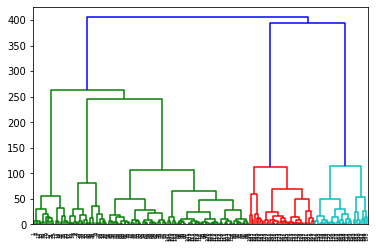

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(feature, method = "ward"))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")

In [ ]:
y_pred = hc.fit_predict(x)

In [ ]:
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
 px.scatter(data, x ="Annual_Income_(k$)",
                 y = "Spending_Score_(1-100)", color = y_pred,
            color_continuous_scale="Blackbody")